## 도메인 및 변수 분석

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

- (온도) 스프레이(냉각) - 보온로 - 냉각수 온도 - 대기온도 - 대기습도 의 연관성

- (속도) 저속속도 - 고속속도 - 고속절환위치 - 고속구간 - 승압시간 - 진공도

- (시간/속도)승압시간 - 에어압력 : 승압시간과 에어압력 간의 계산이 일정하지 못하면 => 공압시스템 문제 가설  

- (온도) 대기온도 - 대기습도 삼분위 - 에어압력 = > 계절별 품질 영향도 가설

- (속도?) 고속절환위치 - 주조 합력 - 형체력 - 불량 연관성 가설

- (온도) 스프레이 - 대기온도 - 대기습도 연관성 : 계절의 변화와 상관없는 스프레이(냉각) 시간의 일관성은 품질에 영향을 미친다.

- (시간) 사이클 타임을 줄여서 생산량을 증가 시간을 불량이 나지 않는 선에서 어디까지 줄일 수 있을지?(저속속도, 고속속도, 스프레이 시간 고려)  


- **나는 온도**
    - 변하는 대기온도 및 습도와 스프레이는 18.5라는 일관적인 시간을 유지한다. 기온이나 습도가 높은 경우 냉각이 제대로 이뤄지지 않을 수도 있다.
    - 급탕이 공압 시스템으로 이뤄진다. 그리고 기압은 기온의 영향을 받는다. 실제로 제조에 영향을 미칠 가능성이 있다.

- 머신러닝이 나의 가설(생산성을 높일지도 모르는 문제의식)을 어떻게 뒷받침할 것인가?
- 그냥 값만 입력해서 머신러닝 모델 별로 비교대조
- **_EDA > 머신러닝_**

1. 현업 데이터이기 때문에 도메인 정보가 더 필요할 수 있다.
2. 회사를 설득한다는 관점에서는 EDA, 추론통계가 더 중요하다.(이걸 메인으로)
3. 머신러닝은 부가적 + XAI를 통해서 머신러닝의 신뢰성 높이기


In [3]:
df = pd.read_csv('제조AI데이터셋_(주)코넥.csv',encoding="cp949")

In [4]:
df

,Unnamed: 0,저속속도(m/s),고속속도(m/s),고속절환위치(mm),고속구간(mm),주조압력(MPa),탕구두께(mm),승압시간(ms),스프레이(sec),싸이클타임(sec),형체력(%),진공도(mmHg),보온로(℃),에어압력,냉각수온도,냉각수압력,대기온도,대기습도,불량여부
0,0,0.340000,2.190000,708,201,68.700000,31,102,18.500000,58.400000,98,742,666,6.420000,21.667000,3.928000,17.471000,61.838000,1
1,1,0.340000,2.190000,709,199,68.800000,31,102,18.500000,58.200000,98,741,666,6.433000,21.667000,3.957000,17.492000,61.809000,1
2,2,0.340000,2.200000,695,210,68.400000,35,125,18.500000,58.400000,97,738,670,6.297000,19.000000,3.689000,17.671000,64.666000,1
3,3,0.340000,2.190000,696,210,68.500000,35,122,18.500000,58.400000,97,739,670,6.243000,19.000000,3.705000,17.737000,64.543000,1
4,4,0.340000,2.190000,706,202,68.700000,34,118,18.500000,58.400000,98,738,670,6.287000,19.000000,3.728000,17.875000,64.825000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87283,87283,0.340000,2.232041,689,226,71.420407,34,84,18.100000,56.044881,98,738,658,6.344081,28.554217,3.812919,34.842239,56.733446,1
87284,87284,0.340000,2.200000,695,220,71.100000,30,71,18.411622,60.430267,92,736,669,6.523947,25.705702,4.170765,30.343448,74.228078,1
87285,87285,0.345732,2.102804,710,211,72.857321,29,67,17.400000,56.300000,99,738,668,6.860072,23.000000,4.180121,22.671038,65.282479,1
87286,87286,0.350000,2.120000,709,212,73.000000,30,66,17.400000,56.300000,99,738,668,6.877349,22.000000,4.267018,22.153813,66.859814,1


#### Preliminary

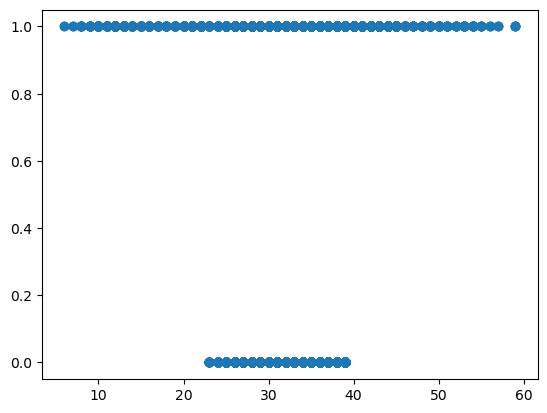

In [6]:
plt.scatter(df['탕구두께(mm)'], df['불량여부'])
plt.show()

# 20 ~ 40mm 바깥으로 나가면 싹 다 불량

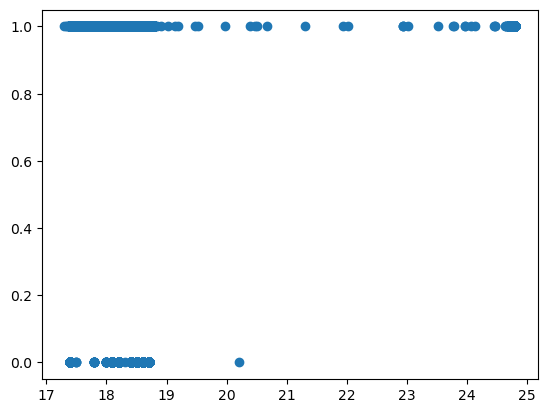

In [7]:
plt.scatter(df['스프레이(sec)'], df['불량여부'])
# 17 ~ 19초 바깥은 99% 불량

#### 의사결정나무나 permutation importance를 써볼까...

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance #permutation_importance

from sklearn.tree import DecisionTreeClassifier

In [9]:
df = pd.read_csv('제조AI데이터셋_(주)코넥.csv',encoding="cp949")
X = df.drop(["불량여부", "Unnamed: 0"], axis=1)  # 불량여부 컬럼을 제외한 나머지
y = df["불량여부"]  

In [10]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# feature importance calculation
def print_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Feature importance:")
    for f, idx in enumerate(indices):
        print("{0}: {1:.2f}%".format(feature_names[idx], importances[idx] * 100))

print_feature_importance(model, X.columns)

# 내부적으로 분할 기준으로 얼마나 지니 불순도를 줄였는지를 합산한 값.
#장점: 계산이 빠름.
#단점: 연속형 변수에 편향 → 값의 범위가 넓거나 분할 가능성이 많은 변수가 과대평가됨.
    #훈련 데이터 기준이라서 실제 예측 성능 반영이 부족할 수 있음.

Feature importance:
냉각수압력: 11.55%
에어압력: 10.88%
주조압력(MPa): 10.37%
싸이클타임(sec): 9.75%
저속속도(m/s): 8.97%
보온로(℃): 7.36%
스프레이(sec): 5.65%
탕구두께(mm): 5.38%
승압시간(ms): 5.03%
대기습도: 4.86%
진공도(mmHg): 4.09%
고속절환위치(mm): 3.54%
형체력(%): 3.34%
고속속도(m/s): 3.01%
고속구간(mm): 2.33%
냉각수온도: 2.26%
대기온도: 1.62%


In [12]:
# permutation importance calculation
def print_permutation_importance(model, X, y):
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()
    print("\nPermutation Importance:")
    for idx in sorted_idx:
        print("{0}: {1:.2f}% +/- {2:.2f}%".format(X.columns[idx],
                                                  perm_importance.importances_mean[idx] * 100,
                                                  perm_importance.importances_std[idx] * 100))

print_permutation_importance(model, X_test, y_test)


Permutation Importance:
대기온도: 0.01% +/- 0.01%
스프레이(sec): 0.04% +/- 0.01%
냉각수온도: 0.04% +/- 0.02%
대기습도: 0.05% +/- 0.01%
고속속도(m/s): 0.06% +/- 0.00%
고속구간(mm): 0.11% +/- 0.02%
고속절환위치(mm): 0.25% +/- 0.01%
주조압력(MPa): 0.28% +/- 0.03%
진공도(mmHg): 0.78% +/- 0.03%
승압시간(ms): 1.32% +/- 0.03%
형체력(%): 2.05% +/- 0.06%
탕구두께(mm): 4.45% +/- 0.07%
싸이클타임(sec): 4.52% +/- 0.08%
보온로(℃): 4.72% +/- 0.06%
냉각수압력: 5.51% +/- 0.18%
에어압력: 7.82% +/- 0.19%
저속속도(m/s): 18.98% +/- 0.17%


- 두 값이 모두 높다 = 핵심 변수 (진짜 중요한 인자).   

=> 냉각수 압력, 에어 압력, 보온로 온도, 저속속도가 유의미한 영향을 끼친다고 예측 가능하다. 

In [13]:
# ai가 짜준 코드로 다시 검증
# 불필요한 열 제거 (Unnamed:0)
if "Unnamed: 0" in df.columns:
    df = df.drop("Unnamed: 0", axis=1)

# X, y 분리
X = df.drop("불량여부", axis=1)
y = df["불량여부"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model_clean = RandomForestClassifier(n_estimators=100, random_state=42)
model_clean.fit(X_train, y_train)

# Feature importance (RandomForest 기준)
rf_importances_clean = model_clean.feature_importances_

# Permutation importance (성능 기여 기준)
perm_importance_clean = permutation_importance(model_clean, X_test, y_test, n_repeats=10, random_state=42)

# 결과 DataFrame으로 정리
importance_df_clean = pd.DataFrame({
    "Feature": X.columns,
    "RF_importance(%)": rf_importances_clean * 100,
    "Permutation_importance_mean(%)": perm_importance_clean.importances_mean * 100,
    "Permutation_importance_std(%)": perm_importance_clean.importances_std * 100
}).sort_values("Permutation_importance_mean(%)", ascending=False)

In [14]:
importance_df_clean.sort_values("Permutation_importance_mean(%)", ascending=False)

,Feature,RF_importance(%),Permutation_importance_mean(%),Permutation_importance_std(%)
0,저속속도(m/s),8.972812,18.976401,0.173956
12,에어압력,10.879483,7.819338,0.186024
14,냉각수압력,11.551460,5.508077,0.175304
11,보온로(℃),7.358713,4.720472,0.060210
8,싸이클타임(sec),9.745076,4.520564,0.082801
5,탕구두께(mm),5.382992,4.451827,0.071763
9,형체력(%),3.343342,2.051781,0.063620
6,승압시간(ms),5.033833,1.322030,0.027803
10,진공도(mmHg),4.086197,0.782449,0.030547
4,주조압력(MPa),10.374334,0.281246,0.026677


#### 통계 분석도 실제로 같은 유의미한 값을 나타내는 지 확인해보자.

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

# 종속변수 제외 (불량여부)
cols = df.columns.drop("불량여부")

# patsy 수식 만들기 (Q("변수명") 형식으로 변환)
formula = 'Q("불량여부") ~ ' + ' + '.join([f'Q("{c}")' for c in cols])

# 모델 정의
model = logit(formula, data=df)

# 학습
result = model.fit()

# 결과 요약
print(result.summary())

# 승산비 (odds ratio) 확인
import numpy as np
odds_ratios = np.exp(result.params)
print("\n[승산비(Odds Ratio)]")
print(odds_ratios)

# 순열, 특성 중요도와 거의 같다.

Optimization terminated successfully.
         Current function value: 0.215530
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Q("불량여부")   No. Observations:                87288
Model:                          Logit   Df Residuals:                    87270
Method:                           MLE   Df Model:                           17
Date:                    금, 26 9 2025   Pseudo R-squ.:                  0.6891
Time:                        13:15:22   Log-Likelihood:                -18813.
converged:                       True   LL-Null:                       -60503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         335.9670      7.182     46.780      0.000     321.891     350.043
Q("저속속도(m/s)"

#### 착수

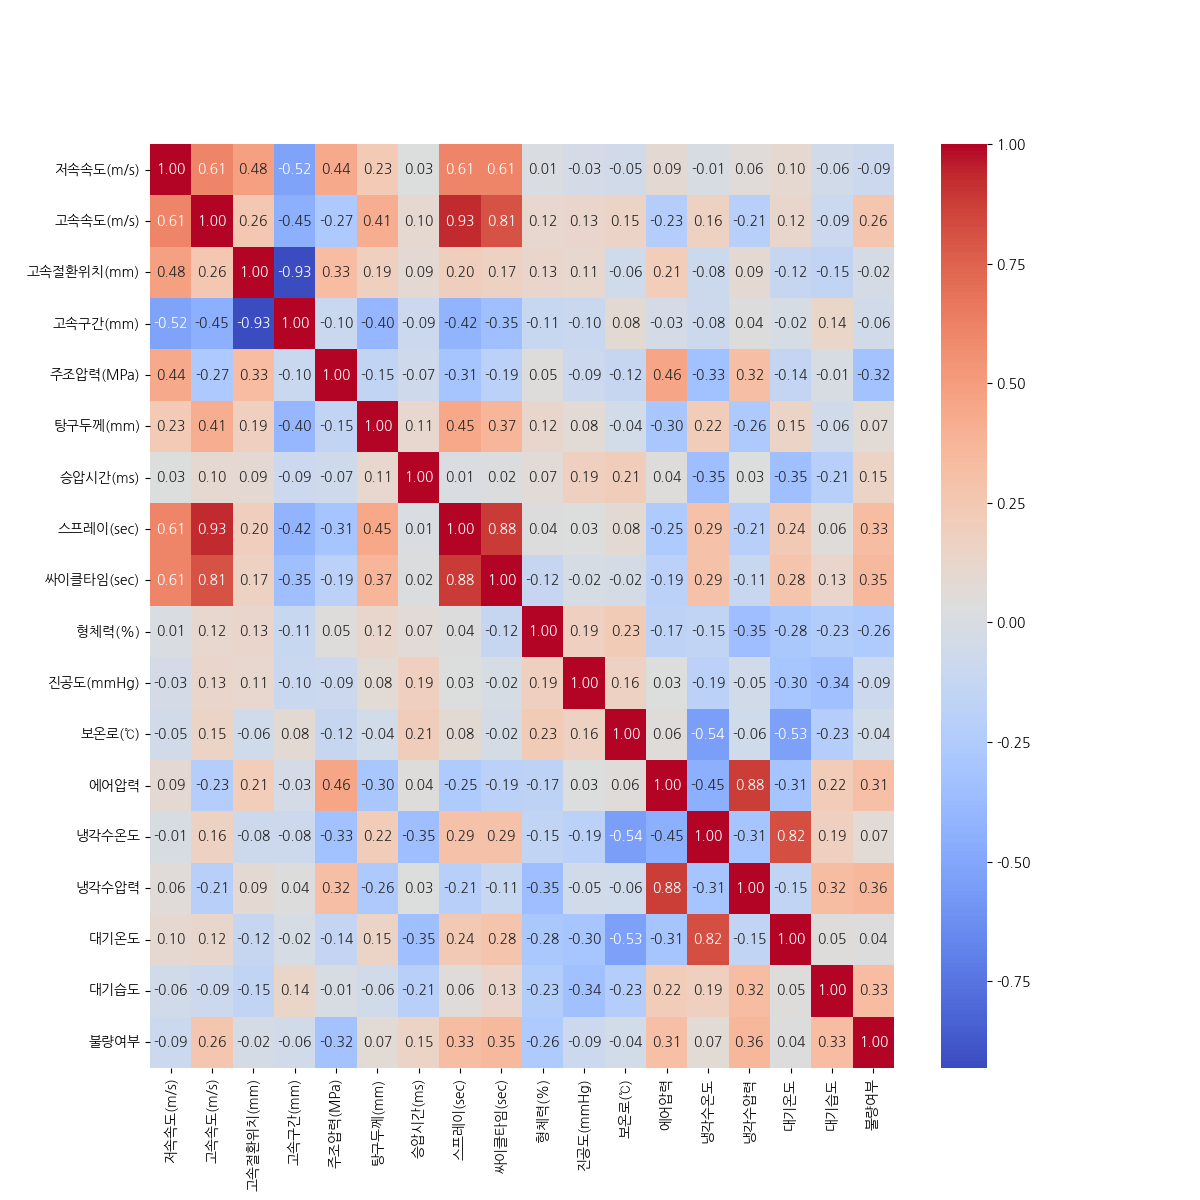
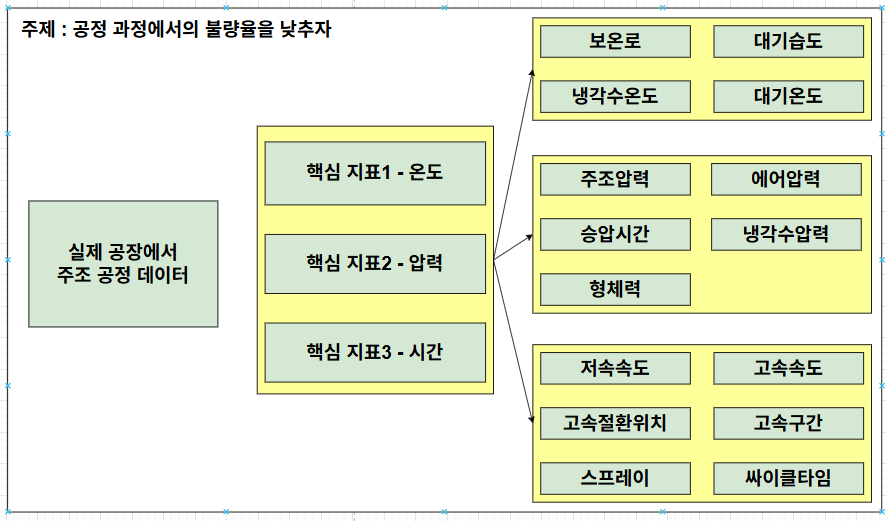
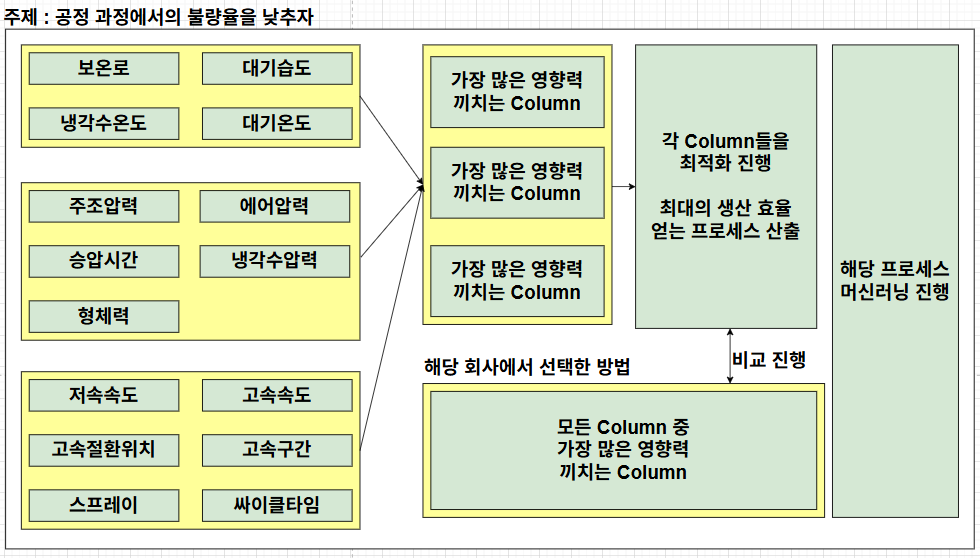


- 변수 설명 및 불량률과의 관계 설명
- 영향력 높은 변수 상위 몇개의 불량률이 적은 값을 넣은 데이터셋 머신러닝 vs 기본 데이터셋 비교
    =>  '이런저런 변수에 이런저런 값 넣으면 불량률 떨어짐'

- 나는 **온도**!
    - 보온로 
        - 금속 용탕의 보온로 온도
        - 전체 4위 / 범주 3위
        - 식거나 과열되면 유동성 문제 발생 = 기포, 미세균열, 충진 불량
    - 대기습도
        - 작업장 습도
        - 전체 14위 / 범주 1위 
        - 간접변수. 금형 표면에 수분이 맺히면 기포 발생
        - 다른 변수가 더 큰 영향력이 있으므로 작게 나타남
    - 냉각수온도
        - 냉각수 온도
        - 전체 15위 / 범주 4위
        - 매우 중요함. 수축 불량, 균열, 편차
        - 온도가 크게 변하지 않기 때문에 영향력이 작게 나왔을 수도
    - 대기온도
        - 작업장 주변 온도 
        - 전체 17위 / 범주 2위
        - 간접변수. 공정조건이 일정치 않은 경우 문제 유발

- 범주 순위는 중요하지 않으니 컷
- 

#### 시각화

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator, MaxNLocator
from typing import Dict
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import chi2_contingency
from scipy import stats
import matplotlib.ticker as mtick

# 윈도우 예시: 'Malgun Gothic' (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 음수 깨짐 방지 (예: -값이 깨져보일 수 있음)
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm

각 변수별 불량여부 시각화  
각 변수별 분석값 분리해서 시각화  
전문적 지식으로 설득력 강화   
  

In [17]:
df["냉각수온도_round"] = df["냉각수온도"].round().astype(int)

result = df.groupby('냉각수온도_round')['불량여부'].value_counts().unstack(fill_value=0)
result

불량여부,0,1
냉각수온도_round,,
19,0,25
20,12,23
21,1565,346
22,2809,1741
23,5389,4509
24,4670,3548
25,5974,2266
26,7184,13764
27,5126,7444


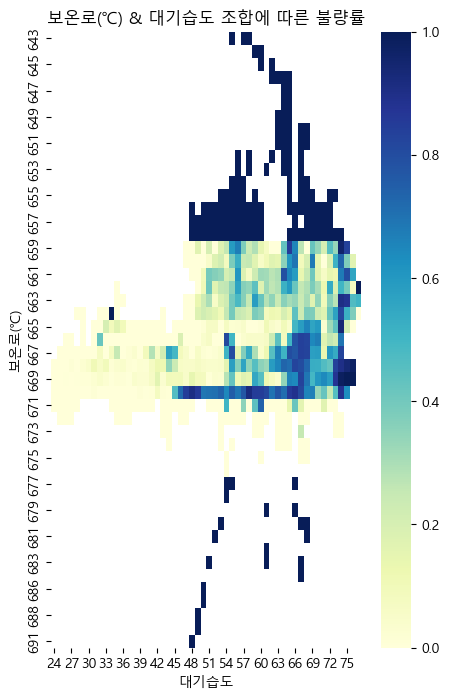

In [ ]:
# 보온로 온도 + 대기습도 ~ 불량여부 히트맵
pivot = df.pivot_table(index=df["보온로(℃)"].round().astype(int),
                       columns=df["대기습도"].round().astype(int),
                       values="불량여부",
                       aggfunc="mean")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,8))
sns.heatmap(pivot, annot=False, cmap="YlGnBu")
plt.title("보온로(℃) & 대기습도 조합에 따른 불량률")
plt.show()

# 알루미늄의 녹는 점 : 섭씨 660.32도
# 660 ~ 670도 사이가 가장 안정적이다. 
# 그 바깥으로 나가면 예외없이 불량

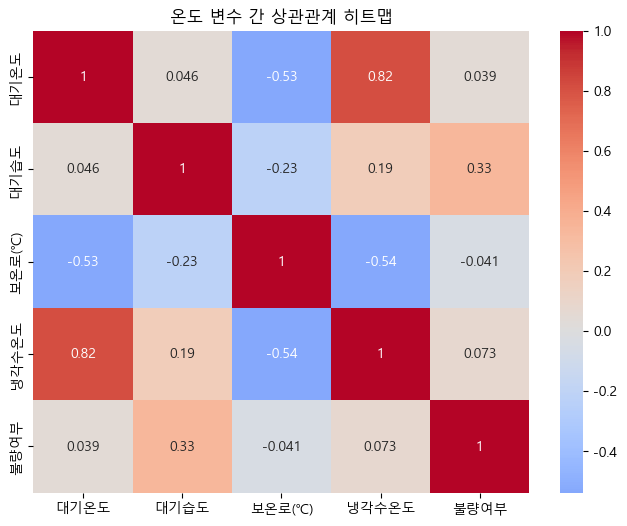

In [ ]:
# 온도변수 - 불량여부 상관계수
cols = ["대기온도", "대기습도", "보온로(℃)", "냉각수온도", "불량여부"]
corr = df[cols].corr()  # 상관계수 행렬

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("온도 변수 간 상관관계 히트맵")
plt.show()

# 모든 변수를 집어 넣었을 때의 결과와 그 수치가 같다.
# 데이터 왜곡 걱정은 할 필요가 없겠다.

# 대기온도가 냉각수온도에 큰 영향을 미친다. 

# 대기온도가 오를수록 보온로는 내려간다?
# 계절에 따라 보온로의 온도를 조정한다고 추측가능하다.
# 그럼에도 불구하고 대기온도가 불량여부에 영향을 덜 미치는 이유는
# 그만큼 공정과 외부환경이 잘 통제되고 있는 까닭으로 보인다.

In [25]:
display(corr.round(2))

,대기온도,대기습도,보온로(℃),냉각수온도,불량여부
대기온도,1.00,0.05,-0.53,0.82,0.04
대기습도,0.05,1.00,-0.23,0.19,0.33
보온로(℃),-0.53,-0.23,1.00,-0.54,-0.04
냉각수온도,0.82,0.19,-0.54,1.00,0.07
불량여부,0.04,0.33,-0.04,0.07,1.00


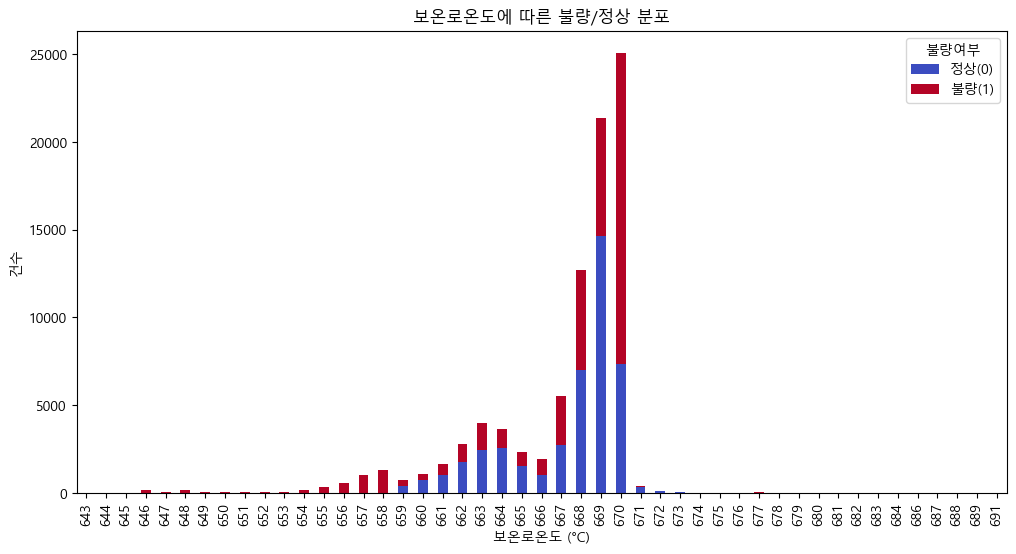

In [25]:
# 보온로온도를 반올림(또는 구간화)해서 그룹핑
df["보온로온도_round"] = df["보온로(℃)"].round().astype(int)

# 불량여부별 개수 집계
stack_data = df.groupby(["보온로온도_round", "불량여부"]).size().unstack(fill_value=0)

# 스택형 막대 차트 그리기
stack_data.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")

plt.title("보온로온도에 따른 불량/정상 분포")
plt.xlabel("보온로온도 (°C)")
plt.ylabel("건수")
plt.legend(title="불량여부", labels=["정상(0)", "불량(1)"])
plt.show()

# 660 ~ 670도 사이에 표본이 몰려있는 것으로 보아 
# 이 구간이 회사가 지향하는 보온로의 온도구간임을 알 수 있다.

#### 로지스틱 회귀 이것저것

In [25]:
model = logit('불량여부 ~ 대기온도 + 대기습도', data = df) 
# (원인) 독립변수 x1 x2 
# (결과) 종속변수 y 
model_result = model.fit()
print('불량여부 ~ 대기온도 + 대기습도')
print(model_result.summary())

# 영향력이 별로 없다.

Optimization terminated successfully.
         Current function value: 0.633612
         Iterations 5
불량여부 ~ 대기온도 + 대기습도
                           Logit Regression Results                           
Dep. Variable:                   불량여부   No. Observations:                87288
Model:                          Logit   Df Residuals:                    87285
Method:                           MLE   Df Model:                            2
Date:                    금, 19 9 2025   Pseudo R-squ.:                 0.08589
Time:                        11:09:51   Log-Likelihood:                -55307.
converged:                       True   LL-Null:                       -60503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4918      0.067    -67.543      0.000      -4.622      -4.361
대기온도      

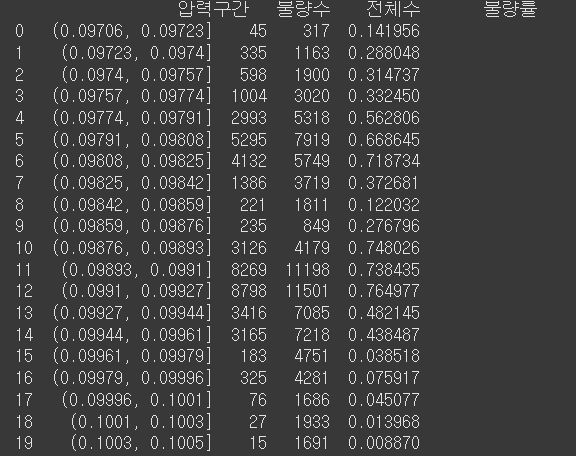

- 데이터에 패턴이 발견되지 않는 걸로 봐서는 변인 통제가 안되는 것으로 보인다.
- 신경안써도 될만큼 영향이 미미하거나 외부환경과 공정의 분리가 잘되어 있다는 뜻이다.

In [26]:
#linear regression

from statsmodels.formula.api import ols, glm

Rformula = 'Q("냉각수온도") ~ Q("대기온도") + Q("대기습도")'
regresstion_result = ols(Rformula, data=df).fit()

print('냉각수온도 ~ 대기온도 + 대기습도')
print(regresstion_result.summary())

# 냉각수온도는 대기온도, 대기습도의 영향을 크게 받는다.

냉각수온도 ~ 대기온도 + 대기습도
                            OLS Regression Results                            
Dep. Variable:             Q("냉각수온도")   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 9.859e+04
Date:                    금, 19 9 2025   Prob (F-statistic):               0.00
Time:                        11:09:51   Log-Likelihood:            -1.4798e+05
No. Observations:               87288   AIC:                         2.960e+05
Df Residuals:                   87285   BIC:                         2.960e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6440      0.039

In [27]:
model = logit('불량여부 ~ 냉각수온도', data = df) 
# (원인) 독립변수 x1 x2 
# (결과) 종속변수 y 
model_result = model.fit()

print('불량여부 ~ 냉각수온도')
print(model_result.summary())

# 냉각수온도도 영향력이 별로 없다.
# 대기온도 + 대기습도 => 냉각수온도
# 그러나 냉각수온도 => 불량여부 영향력 거의 없음


Optimization terminated successfully.
         Current function value: 0.690494
         Iterations 4
불량여부 ~ 냉각수온도
                           Logit Regression Results                           
Dep. Variable:                   불량여부   No. Observations:                87288
Model:                          Logit   Df Residuals:                    87286
Method:                           MLE   Df Model:                            1
Date:                    금, 19 9 2025   Pseudo R-squ.:                0.003828
Time:                        11:09:51   Log-Likelihood:                -60272.
converged:                       True   LL-Null:                       -60503.
Covariance Type:            nonrobust   LLR p-value:                9.516e-103
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5909      0.074    -21.364      0.000      -1.737      -1.445
냉각수온도          0

In [28]:
model = logit('불량여부 ~ 냉각수온도 + 냉각수압력', data = df) 
# (원인) 독립변수 x1 x2 
# (결과) 종속변수 y 
model_result = model.fit()

print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.600527
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   불량여부   No. Observations:                87288
Model:                          Logit   Df Residuals:                    87285
Method:                           MLE   Df Model:                            2
Date:                    금, 19 9 2025   Pseudo R-squ.:                  0.1336
Time:                        11:09:52   Log-Likelihood:                -52419.
converged:                       True   LL-Null:                       -60503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.4971      0.221   -110.624      0.000     -24.931     -24.063
냉각수온도          0.2022      0.

In [34]:
from statsmodels.formula.api import logit

model = logit('불량여부 ~ Q("보온로(℃)") + Q("대기온도") + Q("대기습도") + Q("냉각수온도")', data=df)
model_result = model.fit()

print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.631535
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   불량여부   No. Observations:                87288
Model:                          Logit   Df Residuals:                    87283
Method:                           MLE   Df Model:                            4
Date:                    금, 19 9 2025   Pseudo R-squ.:                 0.08889
Time:                        11:11:46   Log-Likelihood:                -55125.
converged:                       True   LL-Null:                       -60503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -33.2667      1.608    -20.691      0.000     -36.418     -30.116
Q("보온로(℃)")     0.0422    

In [35]:
model = logit('불량여부 ~ Q("보온로(℃)")', data=df)
model_result = model.fit()

print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.692287
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   불량여부   No. Observations:                87288
Model:                          Logit   Df Residuals:                    87286
Method:                           MLE   Df Model:                            1
Date:                    금, 19 9 2025   Pseudo R-squ.:                0.001240
Time:                        11:12:09   Log-Likelihood:                -60428.
converged:                       True   LL-Null:                       -60503.
Covariance Type:            nonrobust   LLR p-value:                 1.665e-34
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.7891      1.211     12.210      0.000      12.415      17.163
Q("보온로(℃)")    -0.0222    